

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>





# Zyfra

Este projeto tem como objetivo desenvolver um modelo que deve prever a quantidade de outo puro extraído do minério de ouro. Para que assim seja possível otimitar a produção e eliminar parâmetros não rentaveis.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho com a introdução
</div>


### Introdução

#### bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

#### Carregando arquivos

In [2]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date')

In [3]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                             

In [4]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 non-null

In [5]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                             

In [6]:
gold_recovery_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Verifica-se que existem dados ausentes em várias colunas. Os mesmos serão preenchidas com o valor obtido no dia anterior.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>




### Calculo de retirada

In [7]:
df_retirada = gold_recovery_train.copy()
c = gold_recovery_train['rougher.output.concentrate_au']

f = gold_recovery_train['rougher.input.feed_au']

t = gold_recovery_train['rougher.output.tail_au']


In [8]:
def calcula_retirada(c,f,t):
    return ((c*(f-t))/(f*(c-t)))*100

In [9]:
df_retirada['calculo_retirada'] = calcula_retirada(c,f,t)
df_retirada['calculo_retirada'].head(10)

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
2016-01-15 05:00:00    88.156912
2016-01-15 06:00:00    88.168065
2016-01-15 07:00:00    87.668336
2016-01-15 08:00:00    87.035862
2016-01-15 09:00:00    87.650868
Name: calculo_retirada, dtype: float64

In [10]:
#Calculo de erro
(df_retirada['calculo_retirada'] - gold_recovery_train['rougher.output.recovery']).abs().mean()

9.303415616264301e-15

Ao realizar o calculo de retirada e comparar o resultado com a coluna 'rougher.output.recovery' observa-se que o EAM é extremamente baixo.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Maravilha, vamos por a mão na massa!
</div>




### Analise do conjunto teste

In [11]:
l1 = list(gold_recovery_test.columns)
l2 = list(gold_recovery_train.columns)

res = [x for x in l1 + l2 if x not in l1 or x not in l2]

print("As colunas faltantes no dataset gold_recovery_test são:")
for x in res:
    print(x)

As colunas faltantes no dataset gold_recovery_test são:
final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tai

### Preenchendo dados ausentes 

Os valores ausentes serão preenchidos com o valor da medição do dia anterior.

In [12]:
gold_recovery_train = gold_recovery_train.fillna(method='ffill')
gold_recovery_test = gold_recovery_test.fillna(method='ffill')
gold_recovery_full = gold_recovery_full.fillna(method='ffill')

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Boa decisão
    
</div>




### Analisando Dados

#### Concentração de metais

##### Concentração de Au

<AxesSubplot:>

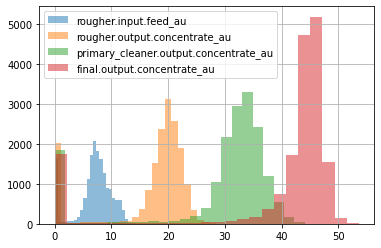

In [13]:
gold_recovery_train['rougher.input.feed_au'].hist(bins=25, legend=True, alpha = 0.5)
gold_recovery_train['rougher.output.concentrate_au'].hist(bins=25, legend=True, alpha = 0.5)
gold_recovery_train['primary_cleaner.output.concentrate_au'].hist(bins=25, legend=True, alpha = 0.5)
gold_recovery_train['final.output.concentrate_au'].hist(bins=25, legend=True, alpha = 0.5)

Observa-se que a concentração de Au aumenta conforme a fase de extração evolui.

##### Concentração de Ag

<AxesSubplot:>

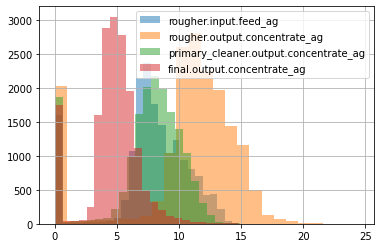

In [14]:
gold_recovery_train['rougher.input.feed_ag'].hist(bins=25, legend=True, alpha = 0.5)
gold_recovery_train['rougher.output.concentrate_ag'].hist(bins=25, legend=True, alpha = 0.5)
gold_recovery_train['primary_cleaner.output.concentrate_ag'].hist(bins=25, legend=True, alpha = 0.5)
gold_recovery_train['final.output.concentrate_ag'].hist(bins=25, legend=True, alpha = 0.5)

Observa-se que a concentração de Ag tende a ser maior nas fases iniciais da mineração.

##### Concentração de Pb

<AxesSubplot:>

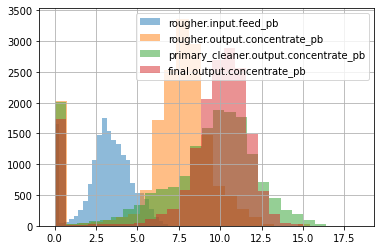

In [15]:
gold_recovery_train['rougher.input.feed_pb'].hist(bins=25, legend=True, alpha=0.5)
gold_recovery_train['rougher.output.concentrate_pb'].hist(bins=25, legend=True, alpha=0.5)
gold_recovery_train['primary_cleaner.output.concentrate_pb'].hist(bins=25, legend=True, alpha = 0.5)
gold_recovery_train['final.output.concentrate_pb'].hist(bins=25, legend=True, alpha = 0.5)

Observa-se que a concentração de Pb tende a ser maior nas fases finais da mineração.

#### Distribuição de tamanho de partículas de minério

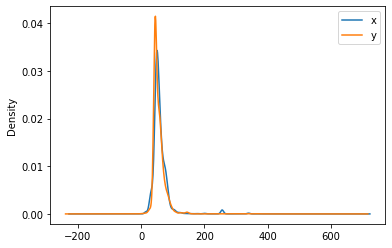

In [16]:
df = pd.DataFrame({
    'x':gold_recovery_train['rougher.input.feed_size'],
    'y':gold_recovery_test['rougher.input.feed_size']
})
ax = df.plot.kde()

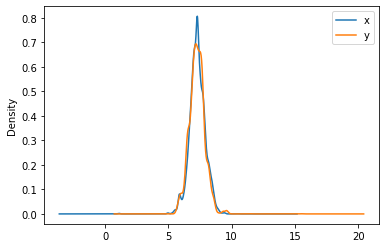

In [17]:
df = pd.DataFrame({
    'x':gold_recovery_train['primary_cleaner.input.feed_size'],
    'y':gold_recovery_test['primary_cleaner.input.feed_size']
})
ax = df.plot.kde()

Ao analisar a distribuição de partícula de minério no conjunto de treinamento e no conjunto de teste, observa-se, que não existem grande diferenças entre os dois conjuntos.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito
</div>

#### Busca por Outliers 

In [18]:
#Função para remoção de outliers
def remove_outlier(df, column):

    Q1 = np.percentile(df[column], 25,interpolation = 'midpoint')
    Q3 = np.percentile(df[column], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
 
    # Upper bound
    upper = np.where(df[column] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df[column] <= (Q1-1.5*IQR))
 
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)

    return df

##### Au

###### Minério Bruto

<AxesSubplot:>

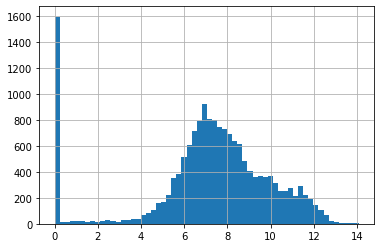

In [19]:
gold_recovery_train['rougher.input.feed_au'].hist(bins=60)

###### Concentrado Bruto

<AxesSubplot:>

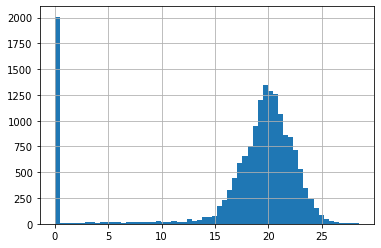

In [20]:
gold_recovery_train['rougher.output.concentrate_au'].hist(bins=60)

###### Concentrado Final

<AxesSubplot:>

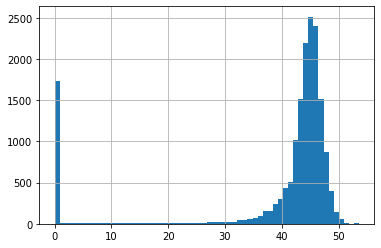

In [21]:
gold_recovery_train['final.output.concentrate_au'].hist(bins=60)

##### Ag

###### Minério Bruto

<AxesSubplot:>

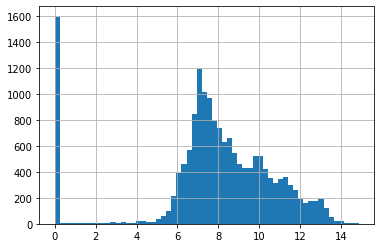

In [22]:
gold_recovery_train['rougher.input.feed_ag'].hist(bins=60)

###### Concentrado Bruto

<AxesSubplot:>

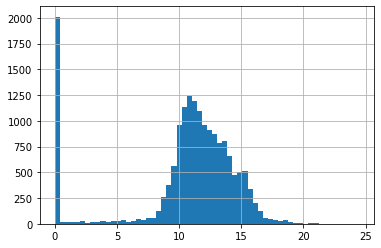

In [23]:
gold_recovery_train['rougher.output.concentrate_ag'].hist(bins=60)

###### Concentrado Final

<AxesSubplot:>

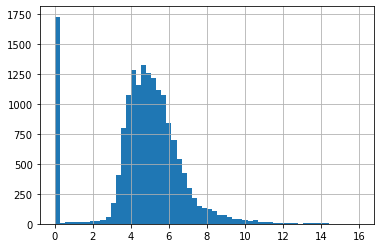

In [24]:
gold_recovery_train['final.output.concentrate_ag'].hist(bins=60)

##### Pb

###### Minério Bruto

<AxesSubplot:>

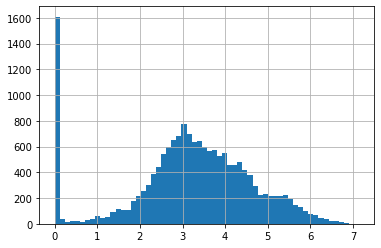

In [25]:
gold_recovery_train['rougher.input.feed_pb'].hist(bins=60)

###### Concentrado Bruto

<AxesSubplot:>

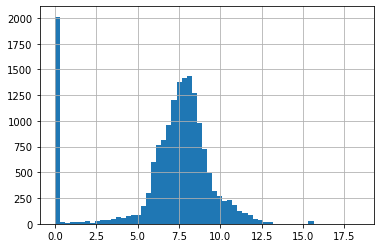

In [26]:
gold_recovery_train['rougher.output.concentrate_pb'].hist(bins=60)

###### Concentrado Final

<AxesSubplot:>

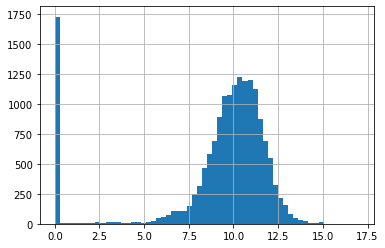

In [27]:
gold_recovery_train['final.output.concentrate_pb'].hist(bins=60)

Apesar dos dados apresentarem outliers, muitos deles próximos a zero, optou-se por não remove-los uma vez que são valores possiveis de ocorrerem. 

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Muito bom!
</div>

### Contrução de modelo

#### Função sMape

In [28]:
def smape(y_true, y_pred):
    error = (y_true - y_pred).abs()
    scale = (y_true.abs () + y_pred.abs()) / 2
    return (error / scale).mean()

def smape_weighted(y_true, y_pred):
    rougher = smape(y_true[0], y_pred[0])
    final = smape(y_true[1], y_pred[1])
    return 0.25 * rougher + 0.75 * final

#### Treinando modelos

In [29]:
#Obtendo targets
target_test = gold_recovery_full[['rougher.output.concentrate_au','final.output.concentrate_au']].loc[gold_recovery_test.index].reset_index(drop=True)

In [30]:
features_train = gold_recovery_train.drop(['rougher.output.concentrate_au','final.output.concentrate_au'], axis=1).reset_index(drop=True)
target_train = gold_recovery_train[['rougher.output.concentrate_au','final.output.concentrate_au']].reset_index(drop=True)

features_test = gold_recovery_test

target_train.columns = [0, 1]


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

def score_model(model, cv=4):
    scores = []
    for subtrain_index, valid_index in KFold(n_splits=cv).split(features_train):
        features_subtrain = features_train.loc[subtrain_index].reset_index(drop=True)
        target_subtrain = target_train.loc[subtrain_index].reset_index(drop=True)
        features_valid = features_train.loc[valid_index].reset_index(drop=True)
        target_valid = target_train.loc[valid_index].reset_index(drop=True)
        
        model.fit(features_subtrain, target_subtrain)
        pred_valid = pd.DataFrame(model.predict(features_valid))

        scores.append(smape_weighted(target_valid, pred_valid))
    return pd.Series(scores).mean()

##### Regressão linear

In [34]:
model = LinearRegression()
lr_score = score_model(model)
print("LR:", lr_score*100)

LR: 28.754086969715566


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Os valores aqui não esão multiplicados por 100, mas beleza. Tudo certinho!
</div>

##### Random Forest

In [35]:
model = RandomForestRegressor(n_estimators=60, max_depth= 11, random_state=12345)
rf_score = score_model(model)
print("RF:", rf_score*100)

RF: 16.39043406163884


#### Aplicando o modelo ao conjunto de teste

In [36]:
model = LinearRegression()
model.fit(features_test, target_test)
pred_valid = pd.DataFrame(model.predict(features_test))

In [37]:
pred_valid.head(10)

,0,1
0,20.700872,55.405119
1,18.277767,53.221892
2,19.850329,53.858859
3,20.245672,52.976794
4,20.183080,52.374808
5,20.044061,51.142386
6,20.678599,50.663729
7,21.389990,52.166845
8,21.184620,52.094930
9,20.474920,50.594392


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Tudo ótimo até aqui!

Estou ansioso pra ver a sua conclusão sobre os modelos e resultados e então teremos finalizados por aqui com um resultado bem legal!

Até breve!
</div>

### Conclusão

Após realizar a análise de todos os dados, foi aplicado aos dados de teste o modelo de Regressão Linear e de Floresta Aleatória.

O modelo de Regressão Linear foi o que apresentou um melhor resultado tendo como base de comparação a fórmula sMape, 28,75%, contra , do modelo de Floresta Aleatória. 

Com isso o mesmo foi aplicado na tabela de teste tendo como resultado os dados apresentados no subitem 6.3



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Excelente trabalho! Fiquei muito impressinado.

Parabéns pela aprovação.
</div>